In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


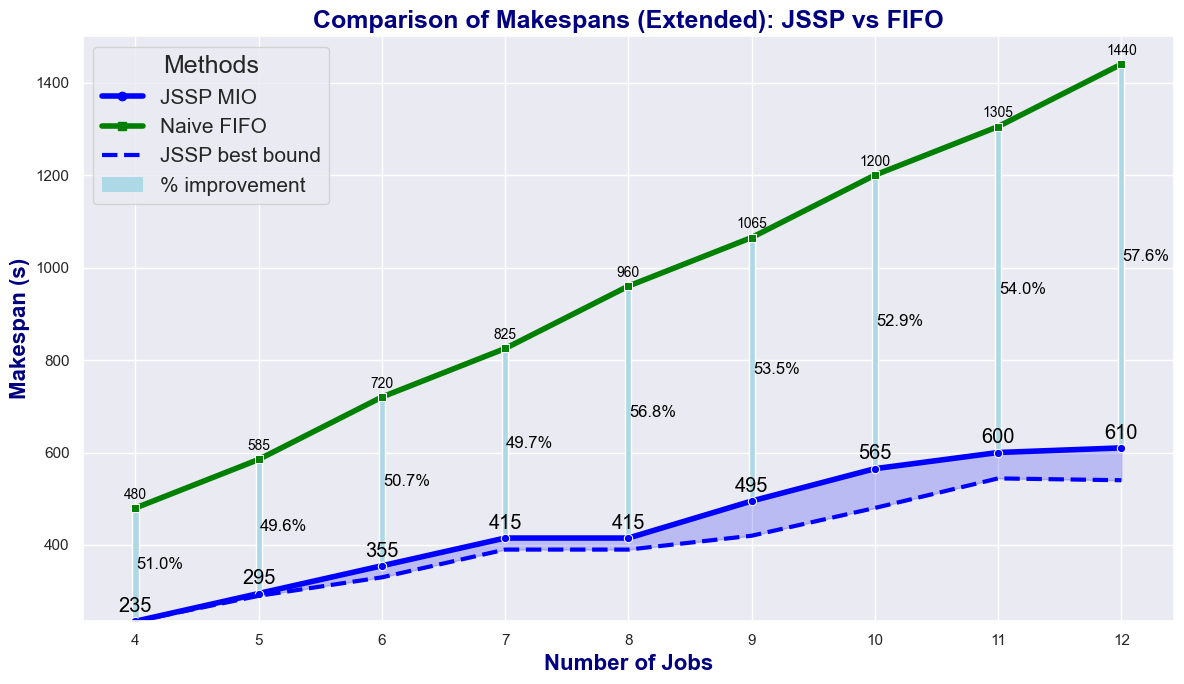

In [162]:
# Read the CSV file into a DataFrame
df = pd.read_csv('JSSPlvl4 - summary.csv')

# Set a stylish and sophisticated theme
sns.set_theme(style="darkgrid", palette="pastel")
custom_ticks = [4, 5, 6, 7, 8, 9, 10, 11, 12]

# Create the plot with a larger figure size for better visibility
plt.figure(figsize=(12, 7))

# Plotting JSSP and FIFO makespans with distinctive markers and line styles
sns.lineplot(x='njobs', y='makespan JSSP', data=df, marker='o', color='blue', label='JSSP MIO', linewidth=4)
sns.lineplot(x='njobs', y='makespan naive', data=df, marker='s', color='green', label='Naive FIFO', linewidth=4)

# Plotting JSSP best bound with a dashed line
sns.lineplot(x='njobs', y='JSSP best bound', data=df, color='blue', label='JSSP Best Bound', linewidth=3, linestyle='--')

# Adding a shaded area as error bound between JSSP makespan and JSSP best bound
plt.fill_between(df['njobs'], df['makespan JSSP'], df['JSSP best bound'], color='blue', alpha=0.2)

# Adding a title with increased font size
plt.title('Comparison of Makespans (Extended): JSSP vs FIFO', fontsize=18, fontweight='bold', color='navy')

# Adding labels to axes with a larger font size
plt.xlabel('Number of Jobs', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Makespan (s)', fontsize=16, fontweight='bold', color='navy')
plt.xticks(custom_ticks)

# Annotate each data point with its value
for i in range(df.shape[0]):
    plt.text(df.njobs[i], df['makespan JSSP'][i] + 20, df['makespan JSSP'][i], horizontalalignment='center', size='large', color='black')
    plt.text(df.njobs[i], df['makespan naive'][i] + 20, df['makespan naive'][i], horizontalalignment='center', size='small', color='black')

# Plotting the tiny improvement bars between the two lines
bar_width = 0.05  # Small width for the tiny bars
df['Improvement (%)'] = (df['makespan naive'] - df['makespan JSSP']) / df['makespan naive'] * 100
df['Improvement (abs)'] = (df['makespan naive'] - df['makespan JSSP']) 
for i in range(df.shape[0]):
    improvement_per = df['Improvement (%)'][i]
    improvement_abs = df['Improvement (abs)'][i]
    plt.bar(df['njobs'][i], improvement_abs, bar_width, bottom=df['makespan JSSP'][i], color='lightblue', align='center')
    plt.text(df['njobs'][i] + 0.2, df['makespan JSSP'][i] + improvement_abs/2, f"{improvement_per:.1f}%", ha='center', va='center', color='black')

# Add the custom legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='JSSP MIO', marker='o'),
    Line2D([0], [0], color='green', lw=4, label='Naive FIFO', marker='s'),
    Line2D([0], [0], color='blue', lw=3, label='JSSP best bound', linestyle='--'),
    plt.Rectangle((0, 0), 1, 1, fc="lightblue", edgecolor='none', label='% improvement')
]
plt.legend(handles=legend_elements, title='Methods', title_fontsize='18', fontsize='15')

# Display the plot
plt.tight_layout()
plt.savefig('extended_jssp.png', dpi=300, bbox_inches='tight')
plt.show()

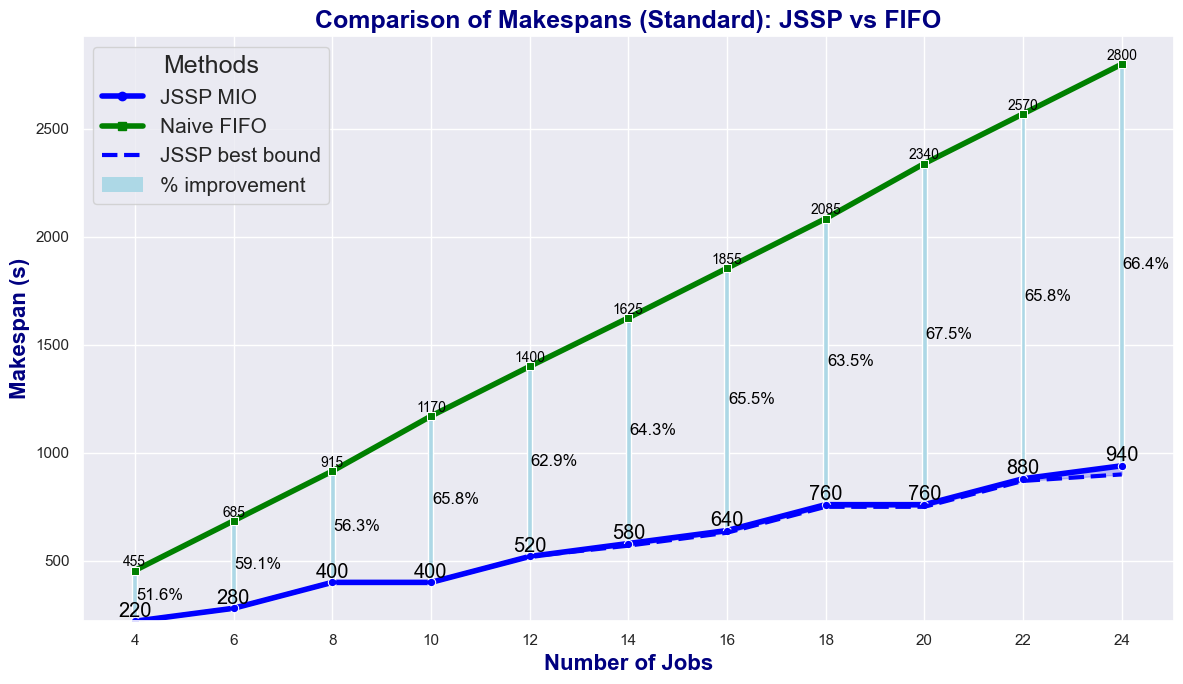

In [161]:
# Read the CSV file into a DataFrame
df = pd.read_csv('JSSPlvl3 - summary.csv')

# Set a stylish and sophisticated theme
sns.set_theme(style="darkgrid", palette="pastel")
custom_ticks = [4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

# Create the plot with a larger figure size for better visibility
plt.figure(figsize=(12, 7))

# Plotting JSSP and FIFO makespans with distinctive markers and line styles
sns.lineplot(x='njobs', y='makespan JSSP', data=df, marker='o', color='blue', label='JSSP MIO', linewidth=4)
sns.lineplot(x='njobs', y='makespan naive', data=df, marker='s', color='green', label='Naive FIFO', linewidth=4)

# Plotting JSSP best bound with a dashed line
sns.lineplot(x='njobs', y='JSSP best bound', data=df, color='blue', label='JSSP Best Bound', linewidth=3, linestyle='--')

# Adding a shaded area as error bound between JSSP makespan and JSSP best bound
plt.fill_between(df['njobs'], df['makespan JSSP'], df['JSSP best bound'], color='blue', alpha=0.2)

# Adding a title with increased font size
plt.title('Comparison of Makespans (Standard): JSSP vs FIFO', fontsize=18, fontweight='bold', color='navy')

# Adding labels to axes with a larger font size
plt.xlabel('Number of Jobs', fontsize=16, fontweight='bold', color='navy')
plt.ylabel('Makespan (s)', fontsize=16, fontweight='bold', color='navy')
plt.xticks(custom_ticks)

# Annotate each data point with its value
for i in range(df.shape[0]):
    plt.text(df.njobs[i], df['makespan JSSP'][i] + 20, df['makespan JSSP'][i], horizontalalignment='center', size='large', color='black')
    plt.text(df.njobs[i], df['makespan naive'][i] + 20, df['makespan naive'][i], horizontalalignment='center', size='small', color='black')

# Plotting the tiny improvement bars between the two lines
bar_width = 0.1  # Small width for the tiny bars
df['Improvement (%)'] = (df['makespan naive'] - df['makespan JSSP']) / df['makespan naive'] * 100
df['Improvement (abs)'] = (df['makespan naive'] - df['makespan JSSP']) 
for i in range(df.shape[0]):
    improvement_per = df['Improvement (%)'][i]
    improvement_abs = df['Improvement (abs)'][i]
    plt.bar(df['njobs'][i], improvement_abs, bar_width, bottom=df['makespan JSSP'][i], color='lightblue', align='center')
    plt.text(df['njobs'][i] + 0.5, df['makespan JSSP'][i] + improvement_abs/2, f"{improvement_per:.1f}%", ha='center', va='center', color='black')

# Add the custom legend
legend_elements = [
    Line2D([0], [0], color='blue', lw=4, label='JSSP MIO', marker='o'),
    Line2D([0], [0], color='green', lw=4, label='Naive FIFO', marker='s'),
    Line2D([0], [0], color='blue', lw=3, label='JSSP best bound', linestyle='--'),
    plt.Rectangle((0, 0), 1, 1, fc="lightblue", edgecolor='none', label='% improvement')
]
plt.legend(handles=legend_elements, title='Methods', title_fontsize='18', fontsize='15')

# Display the plot
plt.tight_layout()
plt.savefig('standard_jssp.png', dpi=300, bbox_inches='tight')
plt.show()

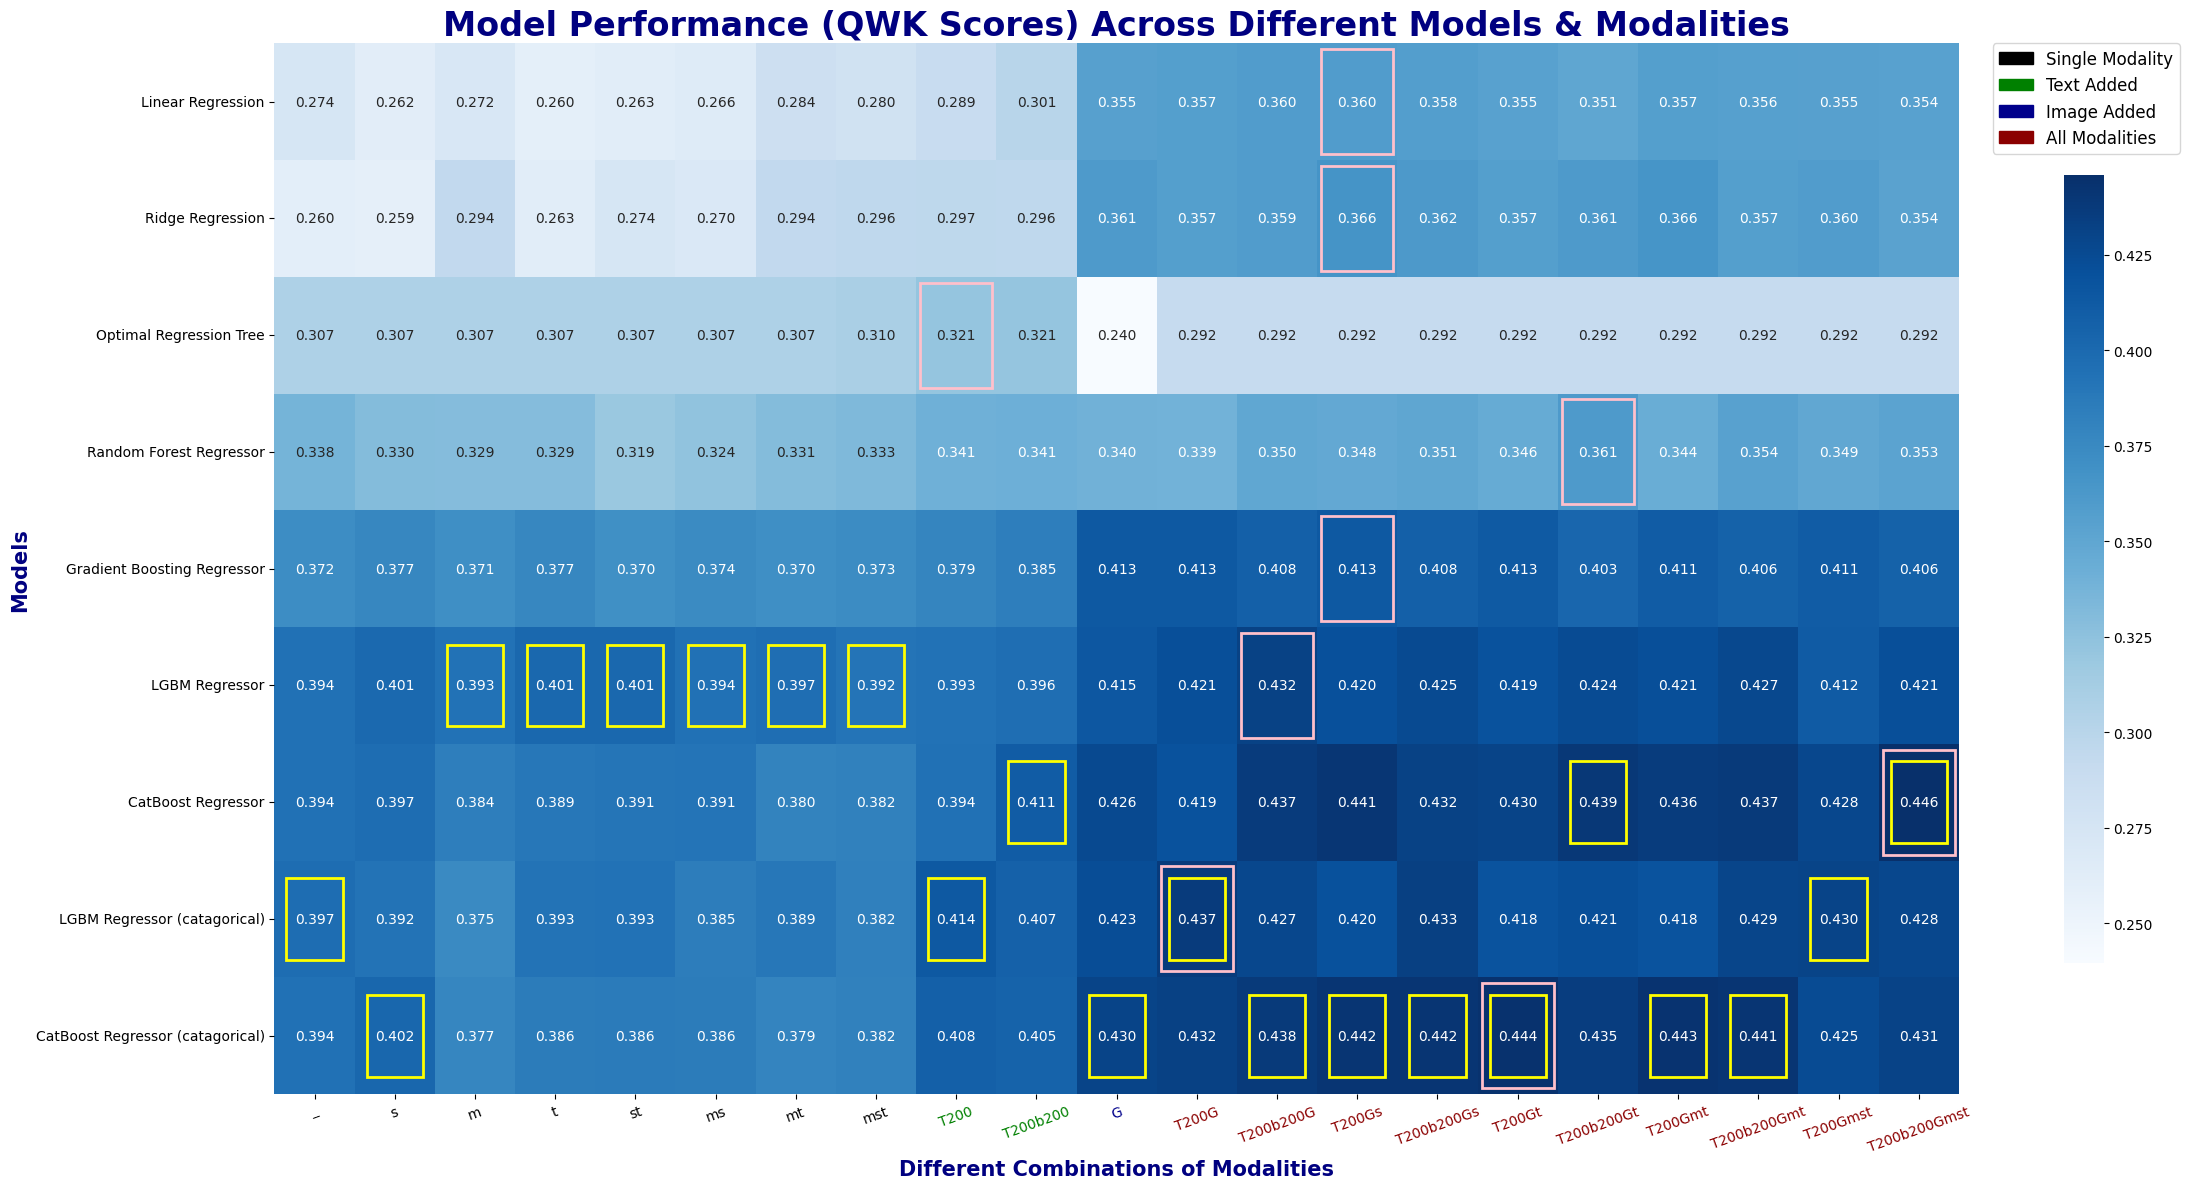

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load data
df = pd.read_csv('ML_project.csv', index_col=0)

# Define modality groupings
modality_groups = {
    'Single Modality': 'black',
    'Text Added': 'green',
    'Image Added': 'darkblue',
    'All Modalities': 'darkred'
}

# Create a heatmap
plt.figure(figsize=(24, 12))
ax = sns.heatmap(df, annot=True, cmap='Blues', fmt=".3f", cbar_kws={'shrink': 0.75})

# Highlight max values in each row
for i, row in enumerate(df.values):
    ax.add_patch(plt.Rectangle((row.argmax()+0.05, i+0.05), 0.9, 0.9, fill=False, edgecolor='pink', lw=2))

# Highlight max values in each column
for i, col in enumerate(df.values.T):
    ax.add_patch(plt.Rectangle((i+0.15, col.argmax()+0.15), 0.7, 0.7, fill=False, edgecolor='yellow', lw=2))

# Annotate column labels with colors
col_modality_group = ['Single Modality'] * 8 + ['Text Added'] * 2 + ['Image Added'] + ['All Modalities'] * (10)
for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(modality_groups[col_modality_group[i]])

# Create patches for the legend
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in modality_groups.items()]

# Add legend to the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize='12')

plt.title('Model Performance (QWK Scores) Across Different Models & Modalities', fontsize=24, fontweight='bold', color='navy')
plt.xlabel('Different Combinations of Modalities', fontsize=15, fontweight='bold', color='navy')
plt.ylabel('Models', fontsize=15, fontweight='bold', color='navy')
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('MLheatmap.png', dpi=400, bbox_inches='tight')
plt.show()

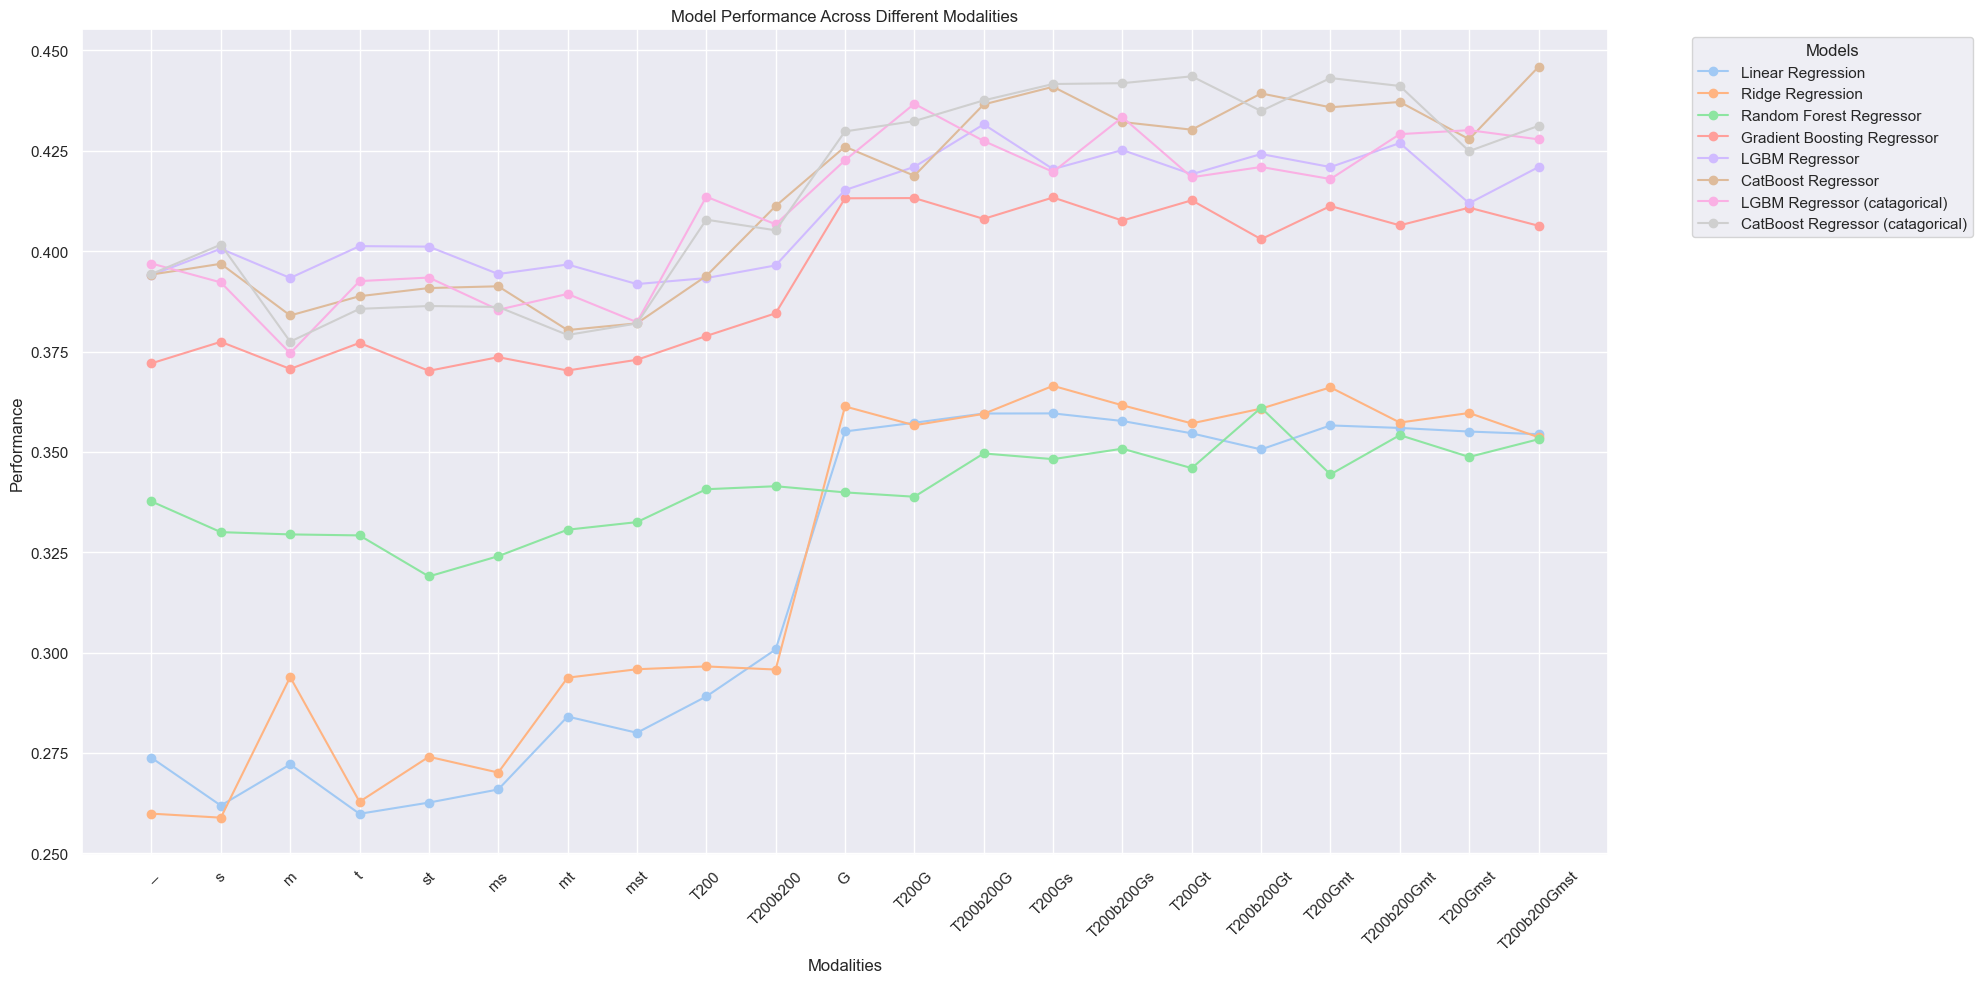

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('ML_project.csv', index_col=0)

# Plotting
ax = df.T.plot(kind='line', figsize=(20, 10), marker='o')

plt.title('Model Performance Across Different Modalities')
plt.ylabel('Performance')
plt.xlabel('Modalities')
plt.xticks(rotation=45, ticks=range(len(df.columns)), labels=df.columns)
plt.legend(title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

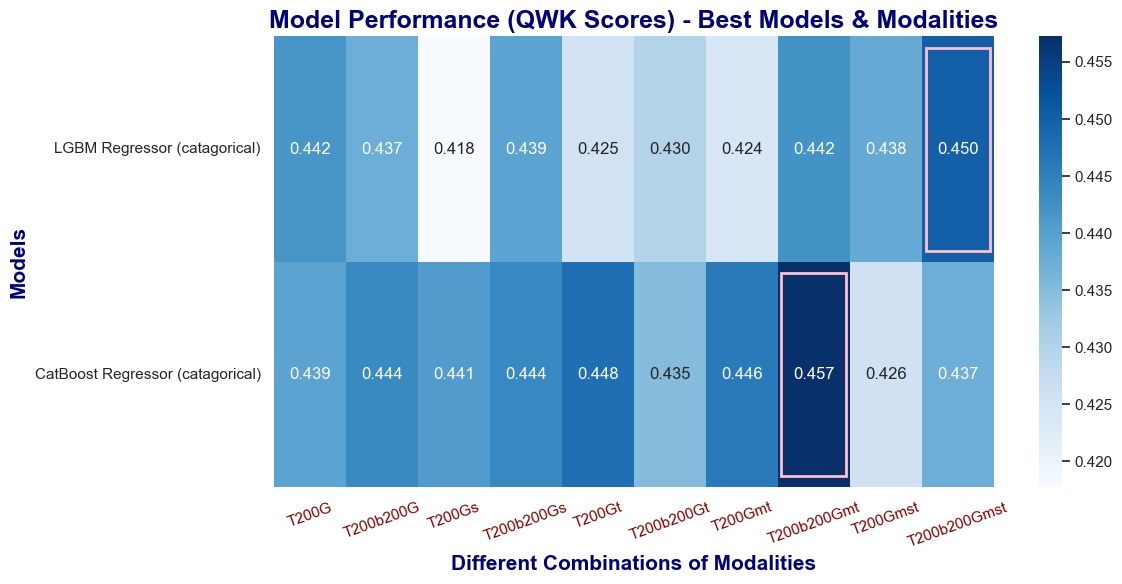

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('ML_project_tune.csv', index_col=0)

# Define modality groupings
modality_groups = {
    'Single Modality': 'black',
    'Text Added': 'green',
    'Image Added': 'darkblue',
    'All Modalities': 'darkred'
}

# Create a heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df, annot=True, cmap='Blues', fmt=".3f", cbar_kws={'shrink': 1})

# Highlight max values in each row
for i, row in enumerate(df.values):
    ax.add_patch(plt.Rectangle((row.argmax()+0.05, i+0.05), 0.9, 0.9, fill=False, edgecolor='pink', lw=2))

# Annotate column labels with colors
col_modality_group = ['All Modalities'] * (df.shape[1])
for i, label in enumerate(ax.get_xticklabels()):
    label.set_color(modality_groups[col_modality_group[i]])

# Create patches for the legend
#legend_patches = [mpatches.Patch(color=color, label=label) for label, color in modality_groups.items()]

# Add legend to the plot
#plt.legend(handles=legend_patches, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0., fontsize='12')

plt.title('Model Performance (QWK Scores) - Best Models & Modalities', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Different Combinations of Modalities', fontsize=15, fontweight='bold', color='navy')
plt.ylabel('Models', fontsize=15, fontweight='bold', color='navy')
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('MLheatmap2.png', dpi=400, bbox_inches='tight')
plt.show()

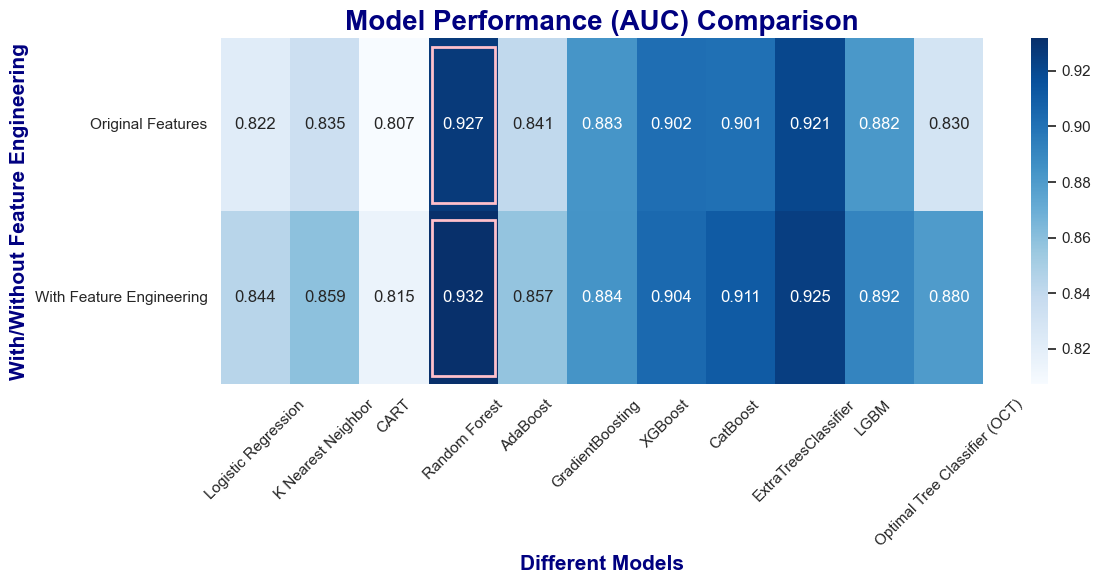

In [193]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Edge_project_compare.csv', index_col=0)


# Create a heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df, annot=True, cmap='Blues', fmt=".3f", cbar_kws={'shrink': 1})

# Highlight max values in each row
for i, row in enumerate(df.values):
    ax.add_patch(plt.Rectangle((row.argmax()+0.05, i+0.05), 0.9, 0.9, fill=False, edgecolor='pink', lw=2))

plt.title('Model Performance (AUC) Comparison', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Different Models', fontsize=15, fontweight='bold', color='navy')
plt.ylabel('With/Without Feature Engineering', fontsize=15, fontweight='bold', color='navy')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('fig_edge.png', dpi=200, bbox_inches='tight')
plt.show()